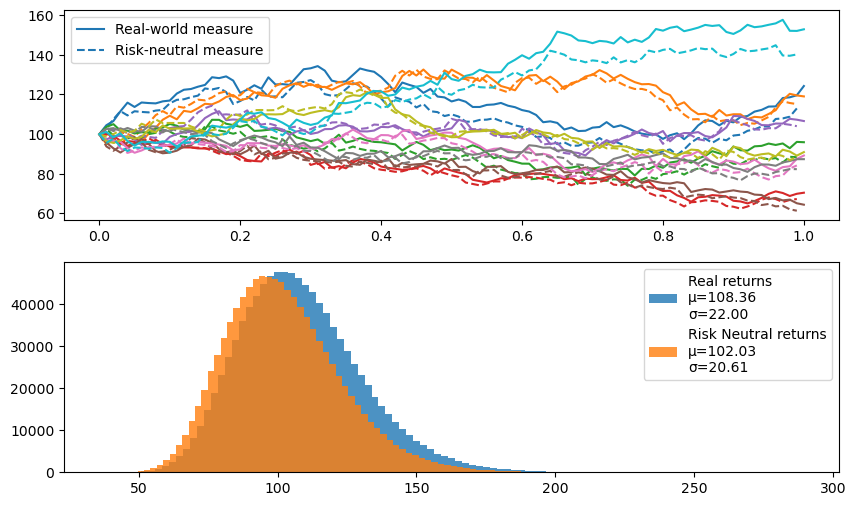

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 0.02  # Risk-free rate
mu = 0.08  # Expected return under real-world measure
sigma = 0.2  # Volatility
T = 1  # Time horizon
dt = 0.01  # Time step
N = int(T/dt)+1  # Number of time steps
M = 1_000_000  # Number of paths

# Simulate asset prices under real-world measure
np.random.seed(0)  # For reproducibility
S0 = 100  # Initial asset price
W = np.random.standard_normal(size=(M, N))  # Brownian increments
W = np.cumsum(W, axis=1) * np.sqrt(dt)  # Cumulative Brownian path
t = np.linspace(0, T, N)  # Time grid
S_real = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)  # Asset prices

# Calculate returns
returns_real = np.log(S_real[:, 1:]) - np.log(S_real[:, :-1])

# Apply Esscher transform
theta = mu - r  # Esscher parameter
returns_rn = returns_real - theta * dt  # Risk-neutral returns

# Convert back to asset prices
S_rn = S0 * np.exp(np.cumsum(returns_rn, axis=1))

S_real[:, 0] = 100
S_rn[:, 0] = 100

# Plot a few paths
fig, axarr = plt.subplots(2, figsize=(10, 6))
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i in range(10):
    color = color_cycle[i % len(color_cycle)]
    axarr[0].plot(t, S_real[i, :], label='Real-world measure' if i == 0 else None, color=color)
    axarr[0].plot(t[:-1], S_rn[i, :], label='Risk-neutral measure'if i == 0 else None, linestyle='--', color=color)
axarr[1].hist(S_real[:, -1], bins=100, alpha=0.8, label=f'Real returns\nμ={np.mean(S_real[:, -1]):.2f}\nσ={np.std(S_real[:, -1]):.2f}')
axarr[1].hist(S_rn[:, -1], bins=100, alpha=0.8, label=f'Risk Neutral returns\nμ={np.mean(S_rn[:, -1]):.2f}\nσ={np.std(S_rn[:, -1]):.2f}')
axarr[0].legend();
axarr[1].legend();

In [2]:
# Naive value of the option
round(np.mean(np.clip(S_real[:, -1] - 100, a_min=0, a_max=np.inf))*np.exp(-r), 2)

12.92

In [3]:
# Correct value of the option (assuming the volatility on the risk neutral measure is correct)
round(np.mean(np.clip(S_rn[:, -1] - 100, a_min=0, a_max=np.inf))*np.exp(-r), 2)

8.93